# Project Description and Goals

The motion picture industry is raking in more revenue than ever with its expansive growth. For this project, I was curious to find out two things:
- What are the top features/drivers of movie revenue?
- Could I be able to build a model that helps predict movie revenue?

The dataset I am working with consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This notebook consists of the discoveries made and work that was done related to uncovering what the drivers of movie revenue are.

### Objectives for this project include:
- Identifying the drivers of a movie's success based on its revenue.
- Documenting process and analysis throughout the data science pipeline.
- Demonstrating the information that was discovered.
- Deliverables:
    - [README.md](https://github.com/aliciag92/cinema-side-project/blob/main/README.md) file containing overall project information, how to reproduce work, and notes from project planning.
    - Jupyter Notebook Report detailing the pipeline process.
    - Python module that automates the data [wrangling](https://github.com/aliciag92/cinema-side-project/blob/main/wrangle.py).

### Pipeline Process:
1. Acquire
2. Prepare
3. Explore
4. Model/Evaluate
5. Deliver

### Initial hypotheses
- Does vote count or vote average affect movie revenue?
- Do higher budget films bring more revenue?
- Do more popular movies bring in more revenue?

### Project Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#data wrangling
import wrangle

#split and scale functions
from sklearn.model_selection import train_test_split
from wrangle import Min_Max_Scaler

#statistical testing
from scipy import stats

# evaluating/modeling methods
import math
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Data Acquisition

In [2]:
#read csv using wrangle.py script and save as df
df = wrangle.get_movies_data()

In [3]:
df.head(3).T

,0,1,2
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


In [4]:
#rows and columns
df.shape

(45466, 24)

In [5]:
#list of column names and data types with more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
#check nulls
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [7]:
#summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


array([[<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>]], dtype=object)

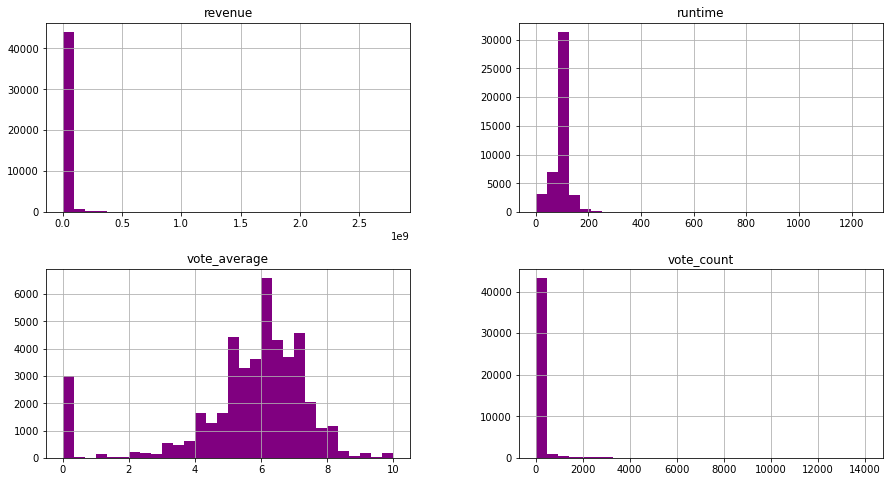

In [8]:
#initial plots for individual plots
df.hist(bins=30,figsize=(15,8),color='purple')

### Findings
- lots of null values (going to drop all for first iteration)
- need to set id as index
- needs scaling
- column names have good titles (no need to change)
- budget and popularity col needs int dtype
- very little nulls in some columns (can be filled in)
- outliers in revenue and vote_count

# Data Preparation

In [9]:
df = wrangle.clean_movies(df)
df.head()

,budget,popularity,revenue,vote_average,vote_count
id,,,,,
862,30000000.0,21.946943,373554033.0,7.7,5415.0
8844,65000000.0,17.015539,262797249.0,6.9,2413.0
15602,0.0,11.712900,0.0,6.5,92.0
31357,16000000.0,3.859495,81452156.0,6.1,34.0
11862,0.0,8.387519,76578911.0,5.7,173.0


In [10]:
#check nulls
df.isnull().sum()

budget          0
popularity      0
revenue         0
vote_average    0
vote_count      0
dtype: int64

In [11]:
#check dtypes
df.dtypes

budget          float64
popularity      float64
revenue         float64
vote_average    float64
vote_count      float64
dtype: object

In [12]:
#split the data using the split function in wrangle.py
train, validate, test = wrangle.split(df)

In [13]:
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data for data exploration
train.head()

overall shape of dataframe: (45466, 5)
train: (25460, 5)
validate: (10912, 5)
test: (9094, 5)


,budget,popularity,revenue,vote_average,vote_count
id,,,,,
125395,0.0,1.472975,0.0,5.5,10.0
38621,0.0,5.573960,0.0,7.0,15.0
79887,0.0,0.277579,0.0,4.5,4.0
38944,0.0,0.401608,0.0,5.7,3.0
30903,0.0,1.660014,0.0,7.7,17.0


In [14]:
#set up X inputs and y target variable for each split 
X_train = train.drop(columns=['revenue'])
y_train = train.revenue

X_validate = validate.drop(columns=['revenue'])
y_validate = validate.revenue

X_test = test.drop(columns=['revenue'])
y_test = test.revenue

In [15]:
#scaling the data using the Min_Max_Scaler function from wrangle.py
X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,budget,popularity,vote_average,vote_count
id,,,,
125395,0.0,0.005128,0.55,0.000710
38621,0.0,0.019404,0.70,0.001066
79887,0.0,0.000966,0.45,0.000284
38944,0.0,0.001398,0.57,0.000213
30903,0.0,0.005779,0.77,0.001208


**Data is:**
- cleaned/prepped
- split into train, validate, test for exploration.
- set up with X inputs and y target variables for each split for model/evaluation.
- scaled into X_train_scaled, X_validate_scaled, and X_test_scaled for model/evaluation.
- ready to be explored on training (in-sample) data.

# Data Exploration

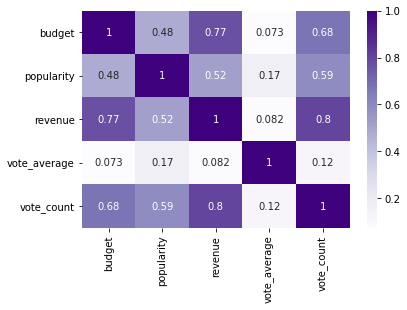

In [16]:
#exploring correlation using heatmap
sns.heatmap(train.corr(), cmap='Purples', annot=True)

plt.show()

### Takeaways:
- The darker/lighter the colors on heatmap, the more of a correlation.
- Revenue seems to correlate the most with vote_count and budget and is somewhat correlated with popularity.
- Vote average and vote count have a small correlation.
- Nothing is negatively correlated.
- Revenue doesn't have too much of a correlation with vote_average.

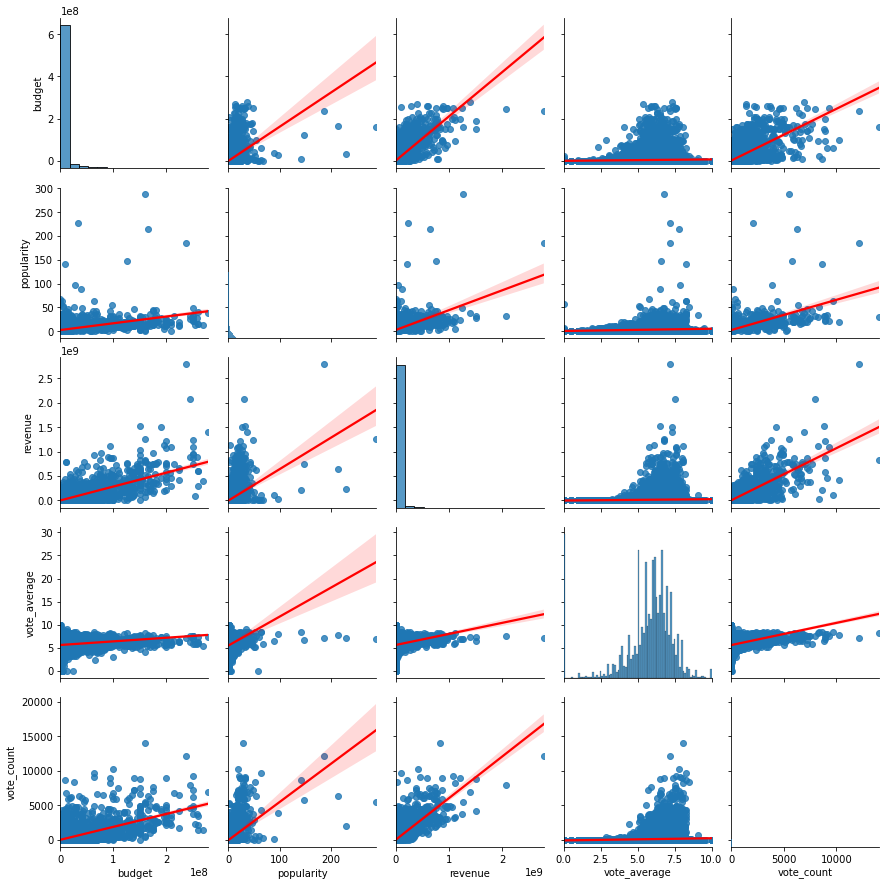

In [17]:
#visualize pairwise relationships w/ regression line
def plot_variable_pairs(train):
    '''
    This function will accept a dataframe as input 
    and plot all the pairwise relationships with the regression line for each pair
    '''
    sns.pairplot(train, 
                kind = "reg", 
                plot_kws = {'line_kws': {'color': 'red'}})
    
plot_variable_pairs(train)

### Takeaways:
- There is a very small correlation between vote count and vote average.
- Vote average gets increasingly higher between ratings of 4 to 8 and then goes down again. 
- Relationship between number of votes and revenue is more positively correlated than the correlation between revenue and vote_average.
- Some of the distributions show skewness, but will not be handling outliers for first iteration.
- The higher the number of votes by users, the more revenue of the film.
- Also, the more popular the movie, the more revenue the film brings in.

In [18]:
#Correlation Test: popularity and revenue
null_hypothesis = "there is no correlation between popularity and revenue."
alternative_hypothesis = "there is a correlation between popularity and revenue."
confidence_level = .95
alpha = 1 - confidence_level

#Use pearsonr function
corr, p = stats.pearsonr(train.popularity, train.revenue)


if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We reject the null hypothesis.
We can move forward with the alternative hypothesis: there is a correlation between popularity and revenue.


In [19]:
#Correlation Test: vote count and revenue
null_hypothesis = "there is no correlation between vote count and revenue."
alternative_hypothesis = "there is a correlation between vote count and revenue."
confidence_level = .95
alpha = 1 - confidence_level

#Use pearsonr function
corr, p = stats.pearsonr(train.vote_count, train.revenue)


if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We reject the null hypothesis.
We can move forward with the alternative hypothesis: there is a correlation between vote count and revenue.


In [20]:
#Correlation Test: budget and revenue
null_hypothesis = "there is no correlation between budget and revenue of a movie."
alternative_hypothesis = "there is a correlation between budget and revenue of a movie."
confidence_level = .95
alpha = 1 - confidence_level

#Use pearsonr function
corr, p = stats.pearsonr(train.budget, train.revenue)


if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We reject the null hypothesis.
We can move forward with the alternative hypothesis: there is a correlation between budget and revenue of a movie.


### Takeaways
- All statistical tests rejected the null hypothesis and can move forward with the alternative hypothesis.
- There is a correlation between a movie's vote count, budget, and popularity with its revenue.

# Data Modeling
### Establish/Evaluate a Baseline Model

In [21]:
#Convert y_train and y_validate to dataframes to append the new columns with predicted values 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#Predict revenue_pred_mean
revenue_pred_mean = y_train['revenue'].mean()
y_train['revenue_pred_mean'] = revenue_pred_mean
y_validate['revenue_pred_mean'] = revenue_pred_mean

#Compute revenue_pred_median
revenue_pred_median = y_train['revenue'].median()
y_train['revenue_pred_median'] = revenue_pred_median
y_validate['revenue_pred_median'] = revenue_pred_median

#Evaluate the baseline model using the mean
#RMSE of revenue_pred_mean
rmse_train = mean_squared_error(y_train.revenue, y_train.revenue_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.revenue, y_validate.revenue_pred_mean) ** .5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

#Evaluate the baseline model using the median
#RMSE of revenue_pred_mean
rmse_train = mean_squared_error(y_train.revenue, y_train.revenue_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.revenue, y_validate.revenue_pred_median) ** .5

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  65692538.03 
Validate/Out-of-Sample:  64692438.81
RMSE using Median
Train/In-Sample:  66678358.97 
Validate/Out-of-Sample:  65676843.6


#### Using the mean for the baseline will be the benchmark for comparison since it performed better than using the median (lower RMSE).

In [22]:
#incrementally building a df for comparison of metrics for model selection
metric_df = pd.DataFrame(data = [{'model': 'mean_baseline', 
                                  'RMSE_validate': rmse_validate,
                                  'r^2_validate': explained_variance_score(y_validate.revenue, y_validate.revenue_pred_mean)}])

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,6.567684e+07,0.0


## LinearRegression (OLS) Model

In [23]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data
lm.fit(X_train_scaled, y_train.revenue)


# predict train
y_train['revenue_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.revenue, y_train.revenue_pred_lm) ** (1/2)


# predict validate
y_validate['revenue_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.revenue, y_validate.revenue_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  33670874.469661266 
Validation/Out-of-Sample:  31264245.482413873


In [24]:
metric_df = metric_df.append({'model': 'OLS Regressor', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.revenue, y_validate.revenue_pred_lm)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,6.567684e+07,0.000000
1,OLS Regressor,3.126425e+07,0.766482


## LassoLars Model

In [25]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data
lars.fit(X_train_scaled, y_train.revenue)


# predict train
y_train['revenue_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.revenue, y_train.revenue_pred_lm) ** (1/2)


# predict validate
y_validate['revenue_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.revenue, y_validate.revenue_pred_lm) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  33670874.469661266 
Validation/Out-of-Sample:  31264245.482413873


In [26]:
metric_df = metric_df.append({'model': 'Lasso alpha 1', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.revenue, y_validate.revenue_pred_lars)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,6.567684e+07,0.000000
1,OLS Regressor,3.126425e+07,0.766482
2,Lasso alpha 1,3.126425e+07,0.766482


## TweedieRegressor (GLM Poisson) Model

In [27]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. 
glm.fit(X_train_scaled, y_train.revenue)


# predict train
y_train['revenue_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.revenue, y_train.revenue_pred_glm) ** (1/2)


# predict validate
y_validate['revenue_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.revenue, y_train.revenue_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  87522250.05531198 
Validation/Out-of-Sample:  87522250.05531198


In [28]:
metric_df = metric_df.append({'model': 'GLM (Poisson)', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.revenue, y_validate.revenue_pred_glm)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,6.567684e+07,0.000000
1,OLS Regressor,3.126425e+07,0.766482
2,Lasso alpha 1,3.126425e+07,0.766482
3,GLM (Poisson),8.752225e+07,-14.544269


## Polynomial Regression (Quadratic) Model

In [29]:
## Polynomial Features ##
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate & X_test
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)

## LinearRegression ##
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data
lm2.fit(X_train_degree2, y_train.revenue)


# predict train
y_train['revenue_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.revenue, y_train.revenue_pred_lm2) ** (1/2)


# predict validate
y_validate['revenue_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.revenue, y_validate.revenue_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  29768974.375658266 
Validation/Out-of-Sample:  877956212302915.2


In [30]:
metric_df = metric_df.append({'model': 'Quadratic Model', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.revenue, y_validate.revenue_pred_lm2)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,6.567684e+07,0.000000
1,OLS Regressor,3.126425e+07,0.766482
2,Lasso alpha 1,3.126425e+07,0.766482
3,GLM (Poisson),8.752225e+07,-14.544269
4,Quadratic Model,8.779562e+14,0.790243


#### OLS Regressor and Lasso alpha 1 had similar scores (lowest RMSE values) and beat the baseline, but will be moving forward with just the OLS Regressor.

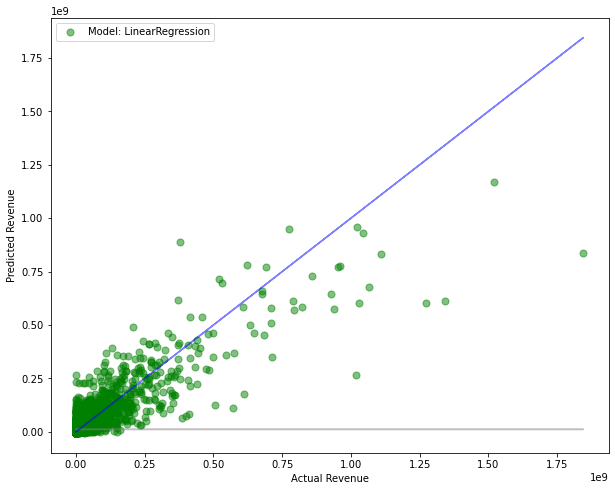

In [31]:
#plotting actual vs predicted values
# y_validate.head()
plt.figure(figsize=(10,8))

plt.plot(y_validate.revenue, y_validate.revenue_pred_mean, alpha=.5, color="gray", label='_nolegend_')

plt.plot(y_validate.revenue, y_validate.revenue, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.revenue, y_validate.revenue_pred_lm, 
            alpha=.5, color="green", s=50, label="Model: LinearRegression")

plt.legend()
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")

plt.show()

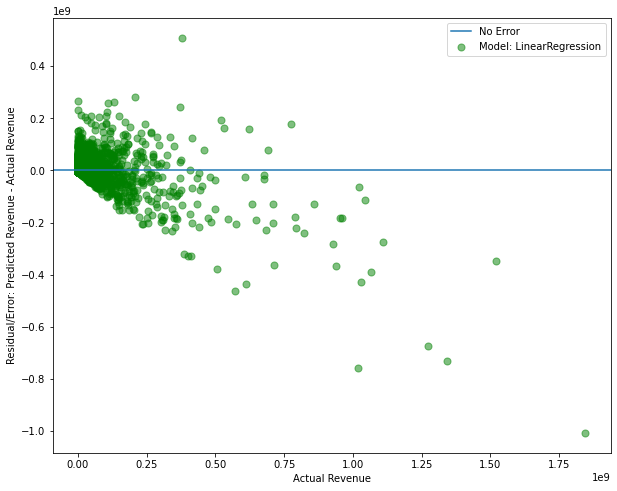

In [32]:
#residual plots: plotting the errors in predictions
# y_validate.head()
plt.figure(figsize=(10,8))

plt.axhline(label="No Error")

plt.scatter(y_validate.revenue, y_validate.revenue_pred_lm - y_validate.revenue, 
            alpha=.5, color="green", s=50, label="Model: LinearRegression")

plt.legend()
plt.xlabel("Actual Revenue")
plt.ylabel("Residual/Error: Predicted Revenue - Actual Revenue")

plt.show()

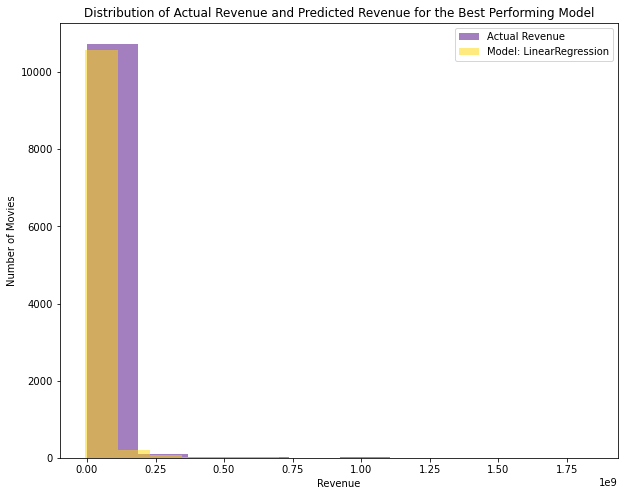

In [33]:
#histogram
# plot to visualize actual vs predicted. 
plt.figure(figsize=(10,8))

plt.hist(y_validate.revenue, color='indigo', alpha=.5, label="Actual Revenue")
plt.hist(y_validate.revenue_pred_lm, color='gold', alpha=.5, label="Model: LinearRegression")

plt.xlabel("Revenue")
plt.ylabel("Number of Movies")
plt.title("Distribution of Actual Revenue and Predicted Revenue for the Best Performing Model")
plt.legend()
plt.show()

#### OLS Regressor shows good consistency with actual revenue.
 

#### Based on the RMSE_validate, R^2 validate data, and plots, the OLS Regressor is the best model to move forward with for testing.

# Data Evaluation

In [34]:
#out of sample evaluation
y_test = pd.DataFrame(y_test)

# predict on test
y_test['revenue_pred_lm'] = lm.predict(X_test_scaled)

# evaluate: rmse and r^2
rmse_test = mean_squared_error(y_test.revenue, y_test.revenue_pred_lm) ** (1/2)
r2_test = explained_variance_score(y_test.revenue, y_test.revenue_pred_lm)
print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)
print('r^2_validate:', r2_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  29124148.980170928
r^2_validate: 0.7633447277190971


In [35]:
metric_df = metric_df.append({'model': 'OLS Model Test', 
                              'RMSE_validate': rmse_test, 
                              'r^2_validate': explained_variance_score(y_test.revenue, y_test.revenue_pred_lm)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,6.567684e+07,0.000000
1,OLS Regressor,3.126425e+07,0.766482
2,Lasso alpha 1,3.126425e+07,0.766482
3,GLM (Poisson),8.752225e+07,-14.544269
4,Quadratic Model,8.779562e+14,0.790243
5,OLS Model Test,2.912415e+07,0.763345


# Conclusion
- My OLS model specified parameters (normalize=True) and used all features in the data set. It had:
    - an RMSE of \$33,670,874.47 on training data
    - an RMSE of \$31,264,245.48 on validate data
    - $r^{2}$ of 0.77 on validate data
    - RMSE of \$29,124,148.98 on test data
    - $r^{2}$ of 0.76 on test data. 
- The $r^{2}$ value means that 76% of the variance in revenue could be explained by the features in the data set.
- The model outperformed baseline and did better than the other models so it should be used moving forward as it predicts revenue.
- With more time, I would like to:
    - prepare data even further by removing outliers, encoding variables, and/or adding new features.
    - explore how genre, release date, language, runtime, and tagline also affect movie revenue.
    - explore clusters, if any.